In [21]:
class data_gen:
    def __init__(self):
        # end of lists below (y and u) represent newest elements while first element is oldest
        self.lst_y = [0]*3 # list of measured outputs
        self.lst_u = [0]*2 # list of measured control inputs
        self.t = 0
        
    def output_meas(self, u):
        # append new control input to end of list
        self.lst_u.append(u)
        
        # lst index [-1] signifies time t, [-2] signifies time (t-1) and so on
        if self.t <= 500:
            y_meas = self.lst_y[-1]/(1 + self.lst_y[-1]**2) + self.lst_u[-1]**3
            
        else:
            y_meas = ((self.lst_y[-1]*self.lst_y[-2]*self.lst_y[-3]*self.lst_u[-2]*
                     (self.lst_y[-3] - 1) + round(self.t/500)*self.lst_u[-1])/
                     (1 + self.lst_y[-2]**2 + self.lst_y[-3]**2))
        
        # append new output measurment to end of list
        self.lst_y.append(y_meas)
        self.t += 1
        return y_meas
    

In [42]:
import numpy as np
from scipy.ndimage.interpolation import shift

class IHOMFAC:
    def __init__(self, eta, lam, mu, ro, eps, alpha, beta, phi_init=0, y_init=0, u_init=0):
        self.eta = eta
        self.lam = lam
        self.mu = mu
        self.ro = ro
        self.eps = eps
        
        self.alpha = np.array(alpha).reshape(1,-1) # row vec
        self.beta = np.array(beta).reshape(1,-1) # row vec
        
        self.y = np.array([y_init]*2)
        self.u = np.array([u_init]*len(alpha)).reshape(-1,1) # col vec
        
        self.phi_init = phi_init
        self.phi_init_sign = np.sign(phi_init)
        self.phi = np.array([phi_init]*len(beta)).reshape(-1,1) # col vec
        
        
    def param_est(self, y_meas):
        self.y = shift(self.y, 1, cval=y_meas) # shifts y arr right and replaces first val with new y meas
        
        # TESTINGVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVVV
#         print(np.shape(self.beta))
#         print(np.shape(self.phi))
        sum_beta = self.beta@self.phi
        del_u_t_1 = self.u[1] - self.u[2]
        del_y_t = self.y[0] - self.y[1]
        
        # New phi estimate
        phi_est = (sum_beta + (self.eta*del_u_t_1)*(del_y_t - del_u_t_1*sum_beta)/(self.mu + del_u_t_1**2))
        
        if (phi_est <= self.eps) or (abs(del_u_t_1) <= self.esp) or (np.sign(phi_est) != self.phi_init_sign):
            phi_est = self.phi_init
            
        self.phi = shift(self.phi, [1,0], cval=phi_est) # shifts phi arr right and replaces first val with new phi est
        
        
    def control_input(self, y_setpoint):
        sum_alpha = self.alpha@self.u
        coeff_denum = lam + self.phi[0]**2
        error = y_setpoint - self.y[0]
        
        u_calc = ((self.phi[0]**2)*self.u[1] + lam*sum_alpha + self.ro*self.phi[0]*error)/coeff_denum
        self.u = shift(self.u, [1,0], cval=u_calc) # shifts u arr right and replaces first val with new control input u
        
        
    def run_algo(self, y_meas, y_setpoint):
        self.param_est(y_meas)
        self.control_input(y_setpoint)
        
        
        

(0.0, 1000.0)

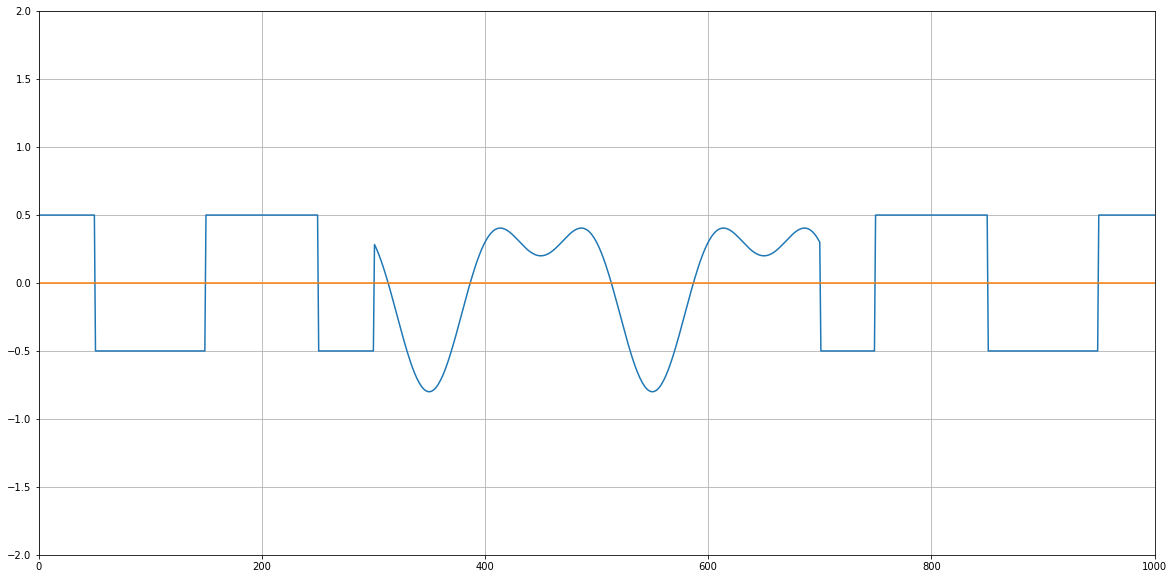

In [47]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import pi
plt.rcParams['figure.figsize'] = [20, 10]

def desired_output(t):
    if (t <= 300) or (t > 700):
        y = 0.5*(-1)**(round(t/100))

    else:
        y = 0.5*np.sin(t*pi/100) + 0.3*np.cos(t*pi/50)

    return y


t = [i for i in range(1001)]
lst_y_setpoint = [desired_output(t_i) for t_i in t]

eta = 0.8
lam = 0.1
mu = 0.01
ro = 0.8
eps = 5e-16
alpha = [0.5, 0.25, 1/8, 1/8]
beta = [0.5, 0.25, 1/8, 1/16, 1/32, 1/32]

obj_data = data_gen()
obj_IHOMFAC = IHOMFAC(eta, lam, mu, ro, eps, alpha, beta)

for k in t:
    y_meas = obj_data.output_meas(obj_IHOMFAC.u[0].reshape(()))
    obj_IHOMFAC.run_algo(y_meas, lst_y_setpoint[k])

plt.plot(t, lst_y_setpoint)
plt.plot(t, obj_data.lst_y[3:])
plt.grid()
plt.ylim((-2,2))
plt.xlim((0,1000))

In [48]:
print(obj_data.lst_u[3:])

[array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0), array(0),

In [28]:
import numpy as np
from scipy.ndimage.interpolation import shift

lst = [1,5,9]
lst2 = [2,2,2]
lst3 = [1,2,3]
arr = np.array(lst).reshape(-1,1)
arr2 = np.array(lst2).reshape(-1,1)
arr3 = np.array(lst3).reshape(-1,1)
# res = arr@arr2
print(arr3)
print(shift(arr3, [1,0], cval=10)) # rotates array 1 step along column and zero along row and replaces shifted val w/ 10
print(len(arr3))
# print(arr)
# print(np.roll(arr, 1))
# print(res)

[[1]
 [2]
 [3]]
[[10]
 [ 1]
 [ 2]]
3


In [30]:
import numpy as np

var = 16
var_sign = np.sign(var)
print(var_sign)


1
